In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Segmentação de imagens

**Propriedades:** 

- Descontinuidade: dividir a imagem com base nas mudanças bruscas de intensidade
    
- Similaridade: divisão das regiões com características semelhantes

Considerando $R$ toda a região ocupada por uma imagem. 
A segmentação é o processo que divide $R$ em $n$, sendo $R = R_1, R_2, ...,R_n$.

In [2]:
def input_image(img_path, is_gray=False):
   img = cv2.imread(img_path)
   img_new = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if is_gray else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
   return img_new

### Detecção de borda

In [ ]:
def conv(f, w):
    '''
        Função que executa a convolução em uma imagem
        params:
            - f: (np.array) imagem de entrada
            - w: mascara de convolução
        return:
            - imagem g com convolução
    '''
    #Coleta a largura e altura da imagem
    N, M = f.shape #(Y, X)
    #Coleta a largura e altura da máscara w
    n, m = w.shape
    # coleta dos parametros a e b da mascara
    a = int((n-1)/2)
    b = int((m-1)/2)
    #flip filtro
    w_flip = np.flip(np.flip(w, 0) , 1)
    #cria uma imagem g similar a f
    g = np.array(f, copy=True)
    #processo de convolução da image 
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = np.sum(np.multiply(f[x-a: x+a+1, y-b:y+b+1], w_flip))
    
    return g.astype(np.uint8)

## Limiarização

### Limiarização global

\begin{equation}
g(x,y) = 
    \begin{cases}
        1 \text{ se } f(x,y) > T \\
        0 \text{ se } f(x,y) \leq T
    \end{cases}
\end{equation}

O algoritmo para a limiarização global é:

- 1: Selecionar um limiar T

- 2: Segmentar a imagem usando a Equação acima. Resultando em dois grupos de pixels: $G_1 > T$ e $G_2 \leq T$

- 3: Calcular os valores de intensidade média de $m_1$ e $m_2$ para os pixels $G_1$ e $G_2$

- 4: Calcular um novo valor de limiar $T = \frac{(m_1 + m_2)}{2}$

- 5: Repita o passo 2 a 4 até que a diferença entre os valores de $T$ em iterações sucessivas seja menor que o parâmetro predefinido $\Delta T$

In [47]:
def limiarizacao_global(image, T, delta_T):
    '''
        aplica a segmentação por limiarização global
        params:
            - image: imagem de entrada
            - T: limiar predefinido
            - delta_T: variacao predefinida
    '''
    T_prev = T
    while (T - T_prev) >= delta_T:
        m1 = np.mean(image[image > T_prev])
        m2 = np.mean(image[image <= T_prev])
        T = int((m1+m2)/2)
        t_prev = T
    
    g = np.zeros(image.shape)
    g[image > T] = 1
    g[image <= T] = 0
    
    return g.astype(np.uint8)

In [36]:
img_digital = input_image(os.path.join("..", "Imagens", "Digital.tif"), is_gray=True)

In [10]:
hist_digital = cv2.calcHist(images=[img_digital], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

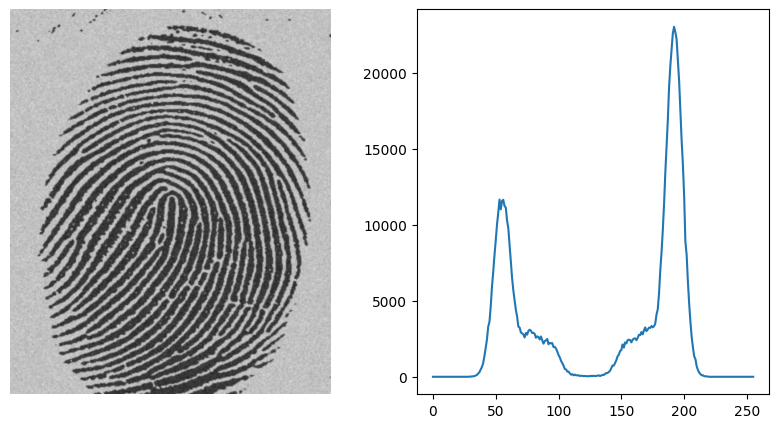

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_digital, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.plot(hist_digital)

plt.show()

In [48]:
img_seg = limiarizacao_global(image=img_digital, T=127, delta_T=0)

In [56]:
hist_seg = cv2.calcHist(images=[img_seg], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

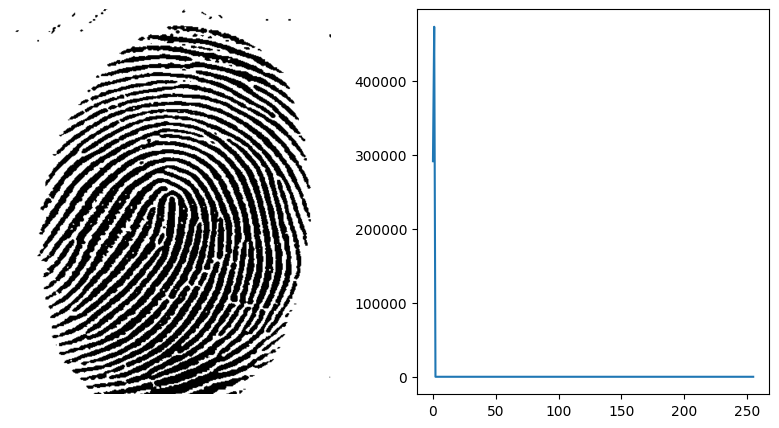

In [57]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_seg, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.plot(hist_seg)

plt.show()

### Otsu